In [10]:
import torch
import torch.nn.functional as F

from PIL import Image

import os
import json
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
import torch.utils.data.dataloader as Data
import torchvision
from torchvision import models
from torchvision import transforms

from captum.attr import IntegratedGradients
from captum.attr import GradientShap
from captum.attr import Occlusion
from captum.attr import NoiseTunnel
from captum.attr import visualization as viz

In [11]:
#model = models.resnet18(pretrained=True)
model= torch.load('../../Desktop/model_1016_2020/model/Model_painting/Net_KD_paintings.pkl')
model.cuda()
#model = model.eval()

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [12]:
labels_path ='../../Downloads/imagenet_class_index.json'#label位址
with open(labels_path) as json_data:
    idx_to_labels = json.load(json_data)
    
#labels_path='Desktop/data/data_1/text/dog'

In [13]:
transform = transforms.Compose([
 transforms.Resize(256),
 transforms.CenterCrop(224),
 transforms.ToTensor()
])

transform_normalize = transforms.Normalize(
     mean=[0.485, 0.456, 0.406],
     std=[0.229, 0.224, 0.225]
 )
#image 路徑
#img = Image.open('Desktop/captum-master/tutorials/img/resnet/swan-3299528_1280.jpg')
#img = Image.open('Downloads/images.jpg')
img = Image.open('../data_dog/pd4.png').convert('RGB')
transformed_img = transform(img)

input = transform_normalize(transformed_img)
input = input.unsqueeze(0)
input = input.cuda()

In [14]:
output = model(input)
output = F.softmax(output, dim=1)
prediction_score, pred_label_idx = torch.topk(output, 1)

pred_label_idx.squeeze_()
predicted_label = idx_to_labels[str(pred_label_idx.item())][1]
print('Predicted:', predicted_label, '(', prediction_score.squeeze().item(), ')')

Predicted: great_white_shark ( 0.9539434909820557 )


In [15]:
print('Predicted:', predicted_label, '(', prediction_score.squeeze().item(), ')')

integrated_gradients = IntegratedGradients(model)
attributions_ig = integrated_gradients.attribute(input, target=pred_label_idx, n_steps=200)

Predicted: great_white_shark ( 0.9539434909820557 )


RuntimeError: CUDA error: CUBLAS_STATUS_EXECUTION_FAILED when calling `cublasSgemm( handle, opa, opb, m, n, k, &alpha, a, lda, b, ldb, &beta, c, ldc)`
Exception raised from gemm at ..\aten\src\ATen\cuda\CUDABlas.cpp:165 (most recent call first):
00007FFC987775A200007FFC98777540 c10.dll!c10::Error::Error [<unknown file> @ <unknown line number>]
00007FFC39AF34E600007FFC39AF24B0 torch_cuda.dll!at::native::sparse_mask_cuda [<unknown file> @ <unknown line number>]
00007FFC38FFCA9700007FFC38FFB990 torch_cuda.dll!at::native::lerp_cuda_tensor_out [<unknown file> @ <unknown line number>]
00007FFC38FFE4D200007FFC38FFDF60 torch_cuda.dll!at::native::addmm_out_cuda [<unknown file> @ <unknown line number>]
00007FFC38FFF64300007FFC38FFF560 torch_cuda.dll!at::native::mm_cuda [<unknown file> @ <unknown line number>]
00007FFC39B61B0F00007FFC39AFE0A0 torch_cuda.dll!at::native::set_storage_cuda_ [<unknown file> @ <unknown line number>]
00007FFC39B51B2200007FFC39AFE0A0 torch_cuda.dll!at::native::set_storage_cuda_ [<unknown file> @ <unknown line number>]
00007FFC31C1D94900007FFC31C18FA0 torch_cpu.dll!at::bucketize_out [<unknown file> @ <unknown line number>]
00007FFC31C5057700007FFC31C50520 torch_cpu.dll!at::mm [<unknown file> @ <unknown line number>]
00007FFC32FAEC7900007FFC32EBE010 torch_cpu.dll!torch::autograd::GraphRoot::apply [<unknown file> @ <unknown line number>]
00007FFC3176715700007FFC31766290 torch_cpu.dll!at::indexing::TensorIndex::boolean [<unknown file> @ <unknown line number>]
00007FFC31C1D94900007FFC31C18FA0 torch_cpu.dll!at::bucketize_out [<unknown file> @ <unknown line number>]
00007FFC31D3210700007FFC31D320B0 torch_cpu.dll!at::Tensor::mm [<unknown file> @ <unknown line number>]
00007FFC32E4B71100007FFC32E4A760 torch_cpu.dll!torch::autograd::profiler::Event::kind [<unknown file> @ <unknown line number>]
00007FFC32E016D800007FFC32E01580 torch_cpu.dll!torch::autograd::generated::AddmmBackward::apply [<unknown file> @ <unknown line number>]
00007FFC32DF7E9100007FFC32DF7B50 torch_cpu.dll!torch::autograd::Node::operator() [<unknown file> @ <unknown line number>]
00007FFC3335F9BA00007FFC3335F300 torch_cpu.dll!torch::autograd::Engine::add_thread_pool_task [<unknown file> @ <unknown line number>]
00007FFC333603AD00007FFC3335FFD0 torch_cpu.dll!torch::autograd::Engine::evaluate_function [<unknown file> @ <unknown line number>]
00007FFC33364FE200007FFC33364CA0 torch_cpu.dll!torch::autograd::Engine::thread_main [<unknown file> @ <unknown line number>]
00007FFC33364C4100007FFC33364BC0 torch_cpu.dll!torch::autograd::Engine::thread_init [<unknown file> @ <unknown line number>]
00007FFC726F08F700007FFC726C9F80 torch_python.dll!THPShortStorage_New [<unknown file> @ <unknown line number>]
00007FFC3335BF1400007FFC3335B780 torch_cpu.dll!torch::autograd::Engine::get_base_engine [<unknown file> @ <unknown line number>]
00007FFCC06514C200007FFCC0651430 ucrtbase.dll!configthreadlocale [<unknown file> @ <unknown line number>]
00007FFCC1F2703400007FFCC1F27020 KERNEL32.DLL!BaseThreadInitThunk [<unknown file> @ <unknown line number>]
00007FFCC2E3D0D100007FFCC2E3D0B0 ntdll.dll!RtlUserThreadStart [<unknown file> @ <unknown line number>]


In [16]:
default_cmap = LinearSegmentedColormap.from_list('custom blue', 
                                                 [(0, '#ffffff'),
                                                  (0.25, '#000000'),
                                                  (1, '#000000')], N=256)

_ = viz.visualize_image_attr(np.transpose(attributions_ig.squeeze().cpu().detach().numpy(), (1,2,0)),
                             np.transpose(transformed_img.squeeze().cpu().detach().numpy(), (1,2,0)),
                             method='heat_map',
                             cmap=default_cmap,
                             show_colorbar=True,
                             sign='positive',
                             outlier_perc=1)

NameError: name 'attributions_ig' is not defined

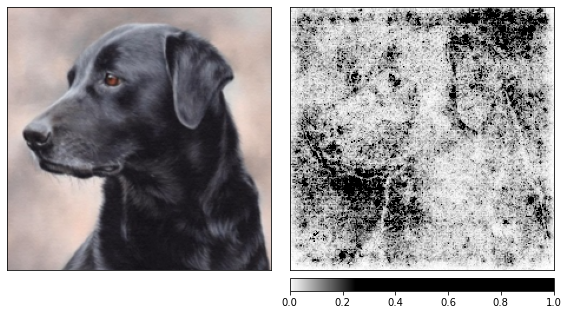

In [17]:

noise_tunnel = NoiseTunnel(integrated_gradients)

attributions_ig_nt = noise_tunnel.attribute(input, n_samples=10, nt_type='smoothgrad_sq', target=pred_label_idx)
_ = viz.visualize_image_attr_multiple(np.transpose(attributions_ig_nt.squeeze().cpu().detach().numpy(), (1,2,0)),
                                      np.transpose(transformed_img.squeeze().cpu().detach().numpy(), (1,2,0)),
                                      ["original_image", "heat_map"],
                                      ["all", "positive"],
                                      cmap=default_cmap,
                                      show_colorbar=True)

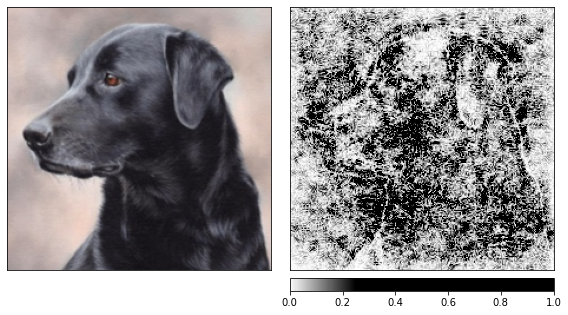

In [18]:
torch.manual_seed(0)
np.random.seed(0)

gradient_shap = GradientShap(model)

# Defining baseline distribution of images
rand_img_dist = torch.cat([input * 0, input * 1])

attributions_gs = gradient_shap.attribute(input,
                                          n_samples=50,
                                          stdevs=0.0001,
                                          baselines=rand_img_dist,
                                          target=pred_label_idx)
_ = viz.visualize_image_attr_multiple(np.transpose(attributions_gs.squeeze().cpu().detach().numpy(), (1,2,0)),
                                      np.transpose(transformed_img.squeeze().cpu().detach().numpy(), (1,2,0)),
                                      ["original_image", "heat_map"],
                                      ["all", "absolute_value"],
                                      cmap=default_cmap,
                                      show_colorbar=True)

In [19]:

occlusion = Occlusion(model)

attributions_occ = occlusion.attribute(input,
                                       strides = (3, 8, 8),
                                       target=pred_label_idx,
                                       sliding_window_shapes=(3,15, 15),
                                       baselines=0)

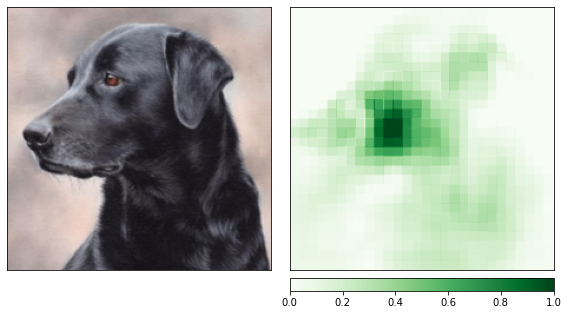

In [20]:
_ = viz.visualize_image_attr_multiple(np.transpose(attributions_occ.squeeze().cpu().detach().numpy(), (1,2,0)),
                                      np.transpose(transformed_img.squeeze().cpu().detach().numpy(), (1,2,0)),
                                      ["original_image", "heat_map"],
                                      ["all", "positive"],
                                      show_colorbar=True,
                                      outlier_perc=2,
                                     )

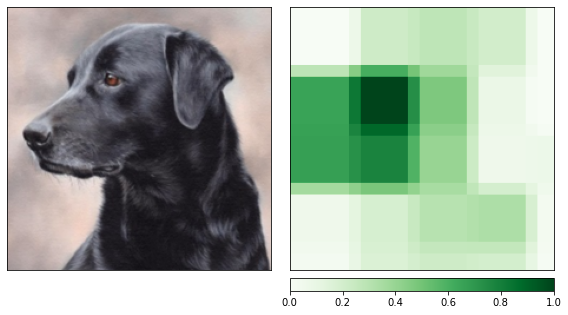

In [21]:
occlusion = Occlusion(model)

attributions_occ = occlusion.attribute(input,
                                       strides = (3, 50, 50),
                                       target=pred_label_idx,
                                       sliding_window_shapes=(3,60, 60),
                                       baselines=0)

_ = viz.visualize_image_attr_multiple(np.transpose(attributions_occ.squeeze().cpu().detach().numpy(), (1,2,0)),
                                      np.transpose(transformed_img.squeeze().cpu().detach().numpy(), (1,2,0)),
                                      ["original_image", "heat_map"],
                                      ["all", "positive"],
                                      show_colorbar=True,
                                      outlier_perc=2,
                                     )